# Introdução

## Visão Geral


Este projeto envolve a análise do "Breast Cancer Wisconsin (Diagnostic) Data Set", disponível no Kaggle. O conjunto de dados é composto por características calculadas a partir de imagens digitalizadas de aspirados por agulha fina (FNA) de massas mamárias. Estas características descrevem propriedades dos núcleos celulares presentes nas imagens.

## Fontes de Dados

- **Kaggle**: Disponível como um conjunto de dados padrão para análise de aprendizado de máquina.
- **Repositório de Aprendizado de Máquina da UCI**: [Link para o dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/).


## Informações sobre os Atributos

O conjunto de dados inclui um número de identificação e um diagnóstico (M = maligno, B = benigno), seguido de trinta características numéricas calculadas para cada núcleo celular, divididas em três categorias: média, erro padrão e "pior" (média dos três maiores valores). Estas características incluem:

1. **ID number**
2. **Diagnosis (M = malignant, B = benign)**
3. **Características dos Núcleos Celulares**:
   - Raio (média das distâncias do centro aos pontos no perímetro)
   - Textura (desvio padrão dos valores em escala de cinza)
   - Perímetro
   - Área
   - Suavidade (variação local no comprimento dos raios)
   - Compactação (perímetro² / área - 1.0)
   - Concavidade (severidade das porções côncavas do contorno)
   - Pontos côncavos (número de porções côncavas do contorno)
   - Simetria
   - Dimensão fractal ("aproximação da linha costeira" - 1)

### Distribuição das Classes
- **Benignos**: 357 casos
- **Malignos**: 212 casos

## Objetivo

O objetivo desta análise é desenvolver um modelo de aprendizado de máquina que implemente a técnica de Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados. O uso de PCA visa minimizar a quantidade de testes necessários, mantendo a precisão na classificação de tumores mamários como benignos ou malignos.

# 1. Aquisição dos Dados

Iniciamos a análise de dados importando a biblioteca pandas e carregando os dados de um arquivo CSV. pandas é fundamental para manipular e analisar dados em Python. 

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
data.drop("id", axis=1, inplace=True)

Após carregar os dados, utilizamos data.describe() para obter um resumo estatístico das colunas numéricas. Este método fornece informações úteis como média, desvio padrão, mínimo, e máximo, oferecendo uma visão inicial importante do conjunto de dados.

In [3]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# 2. Pré-processamento dos Dados

O pré-processamento dos dados é uma etapa crucial onde preparamos o conjunto de dados para análises posteriores, garantindo que eles estejam em um formato adequado.

## Limpeza e Transformação dos Dados

Inicialmente, realizamos transformações nos dados, como substituir valores em colunas específicas para facilitar a análise. Por exemplo, convertemos valores categóricos em numéricos para simplificar processos de modelagem:

In [4]:
data = data.replace({
    "diagnosis": { 
        "M": 1,
        "B": 0
    }
})

Além disso, removemos colunas irrelevantes ou que não contribuem para a análise. Por exemplo, a coluna "id" pode ser removida, pois não é útil para análise de dados:

## Tratamento de Dados Faltantes

É fundamental verificar a presença de dados faltantes no conjunto, pois eles podem impactar a qualidade das análises.

In [5]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

Após identificar colunas com dados ausentes, procedemos com o tratamento desses dados. Uma abordagem comum é remover colunas com muitos valores faltantes.

In [6]:
data.dropna(axis=1, inplace=True)
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


## Separação de Variáveis Preditoras e Alvo

O nosso penúltimo passo no pré-processamento é separar as variáveis preditoras das variáveis alvo. Esta etapa é fundamental para modelos de aprendizado de máquina, onde precisamos distinguir entre os dados de entrada (features) e o que desejamos prever (target).

In [7]:
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

Com X representando as variáveis independentes e y a variável dependente (alvo), o conjunto de dados está agora pronto para ser utilizado em modelos de aprendizado de máquina ou análises estatísticas mais profundas.

## Normalização dos Dados

Para finalizar, antes de aplicar qualquer modelo, é essencial normalizar os dados para garantir que todas as variáveis tenham o mesmo peso. Utilizamos o StandardScaler do sklearn para isso:

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


A normalização ajusta as variáveis preditoras para terem média zero e variância unitária, essencial para muitos algoritmos de aprendizado de máquina.

## Análises Gráficas

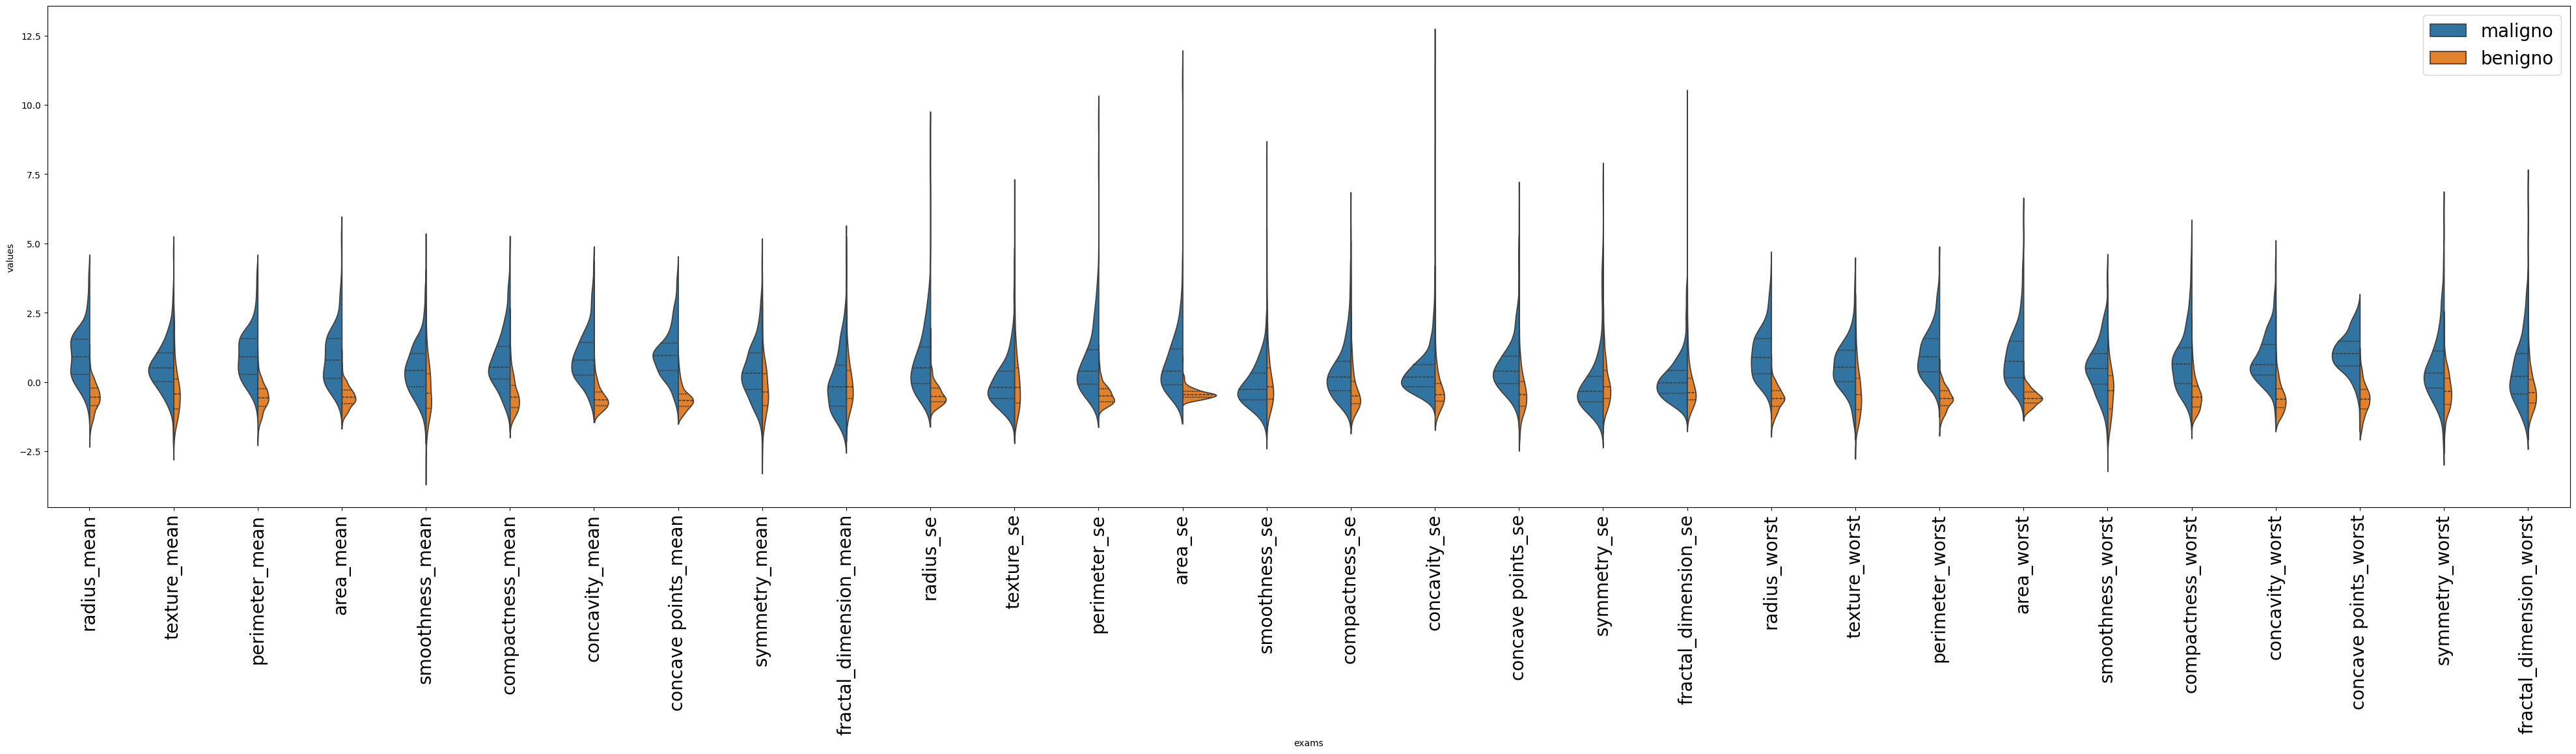

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'X' e 'y' sejam seus dados
x_violin = pd.DataFrame(X, columns=data.columns[1:])
dados_plot_violin = pd.concat([y, x_violin], axis=1)
dados_plot_violin['diagnosis'] = dados_plot_violin['diagnosis'].map({0: 'benigno', 1: 'maligno'})
dados_plot_violin = pd.melt(dados_plot_violin, id_vars="diagnosis", var_name="exams", value_name="values")

plt.figure(figsize=(50, 10))
sns.violinplot(x="exams", y="values", hue="diagnosis", data=dados_plot_violin, split=True, inner="quart")
plt.xticks(rotation=90, fontsize=20)
plt.legend(fontsize=20)
plt.show()


### Correlação

<Axes: >

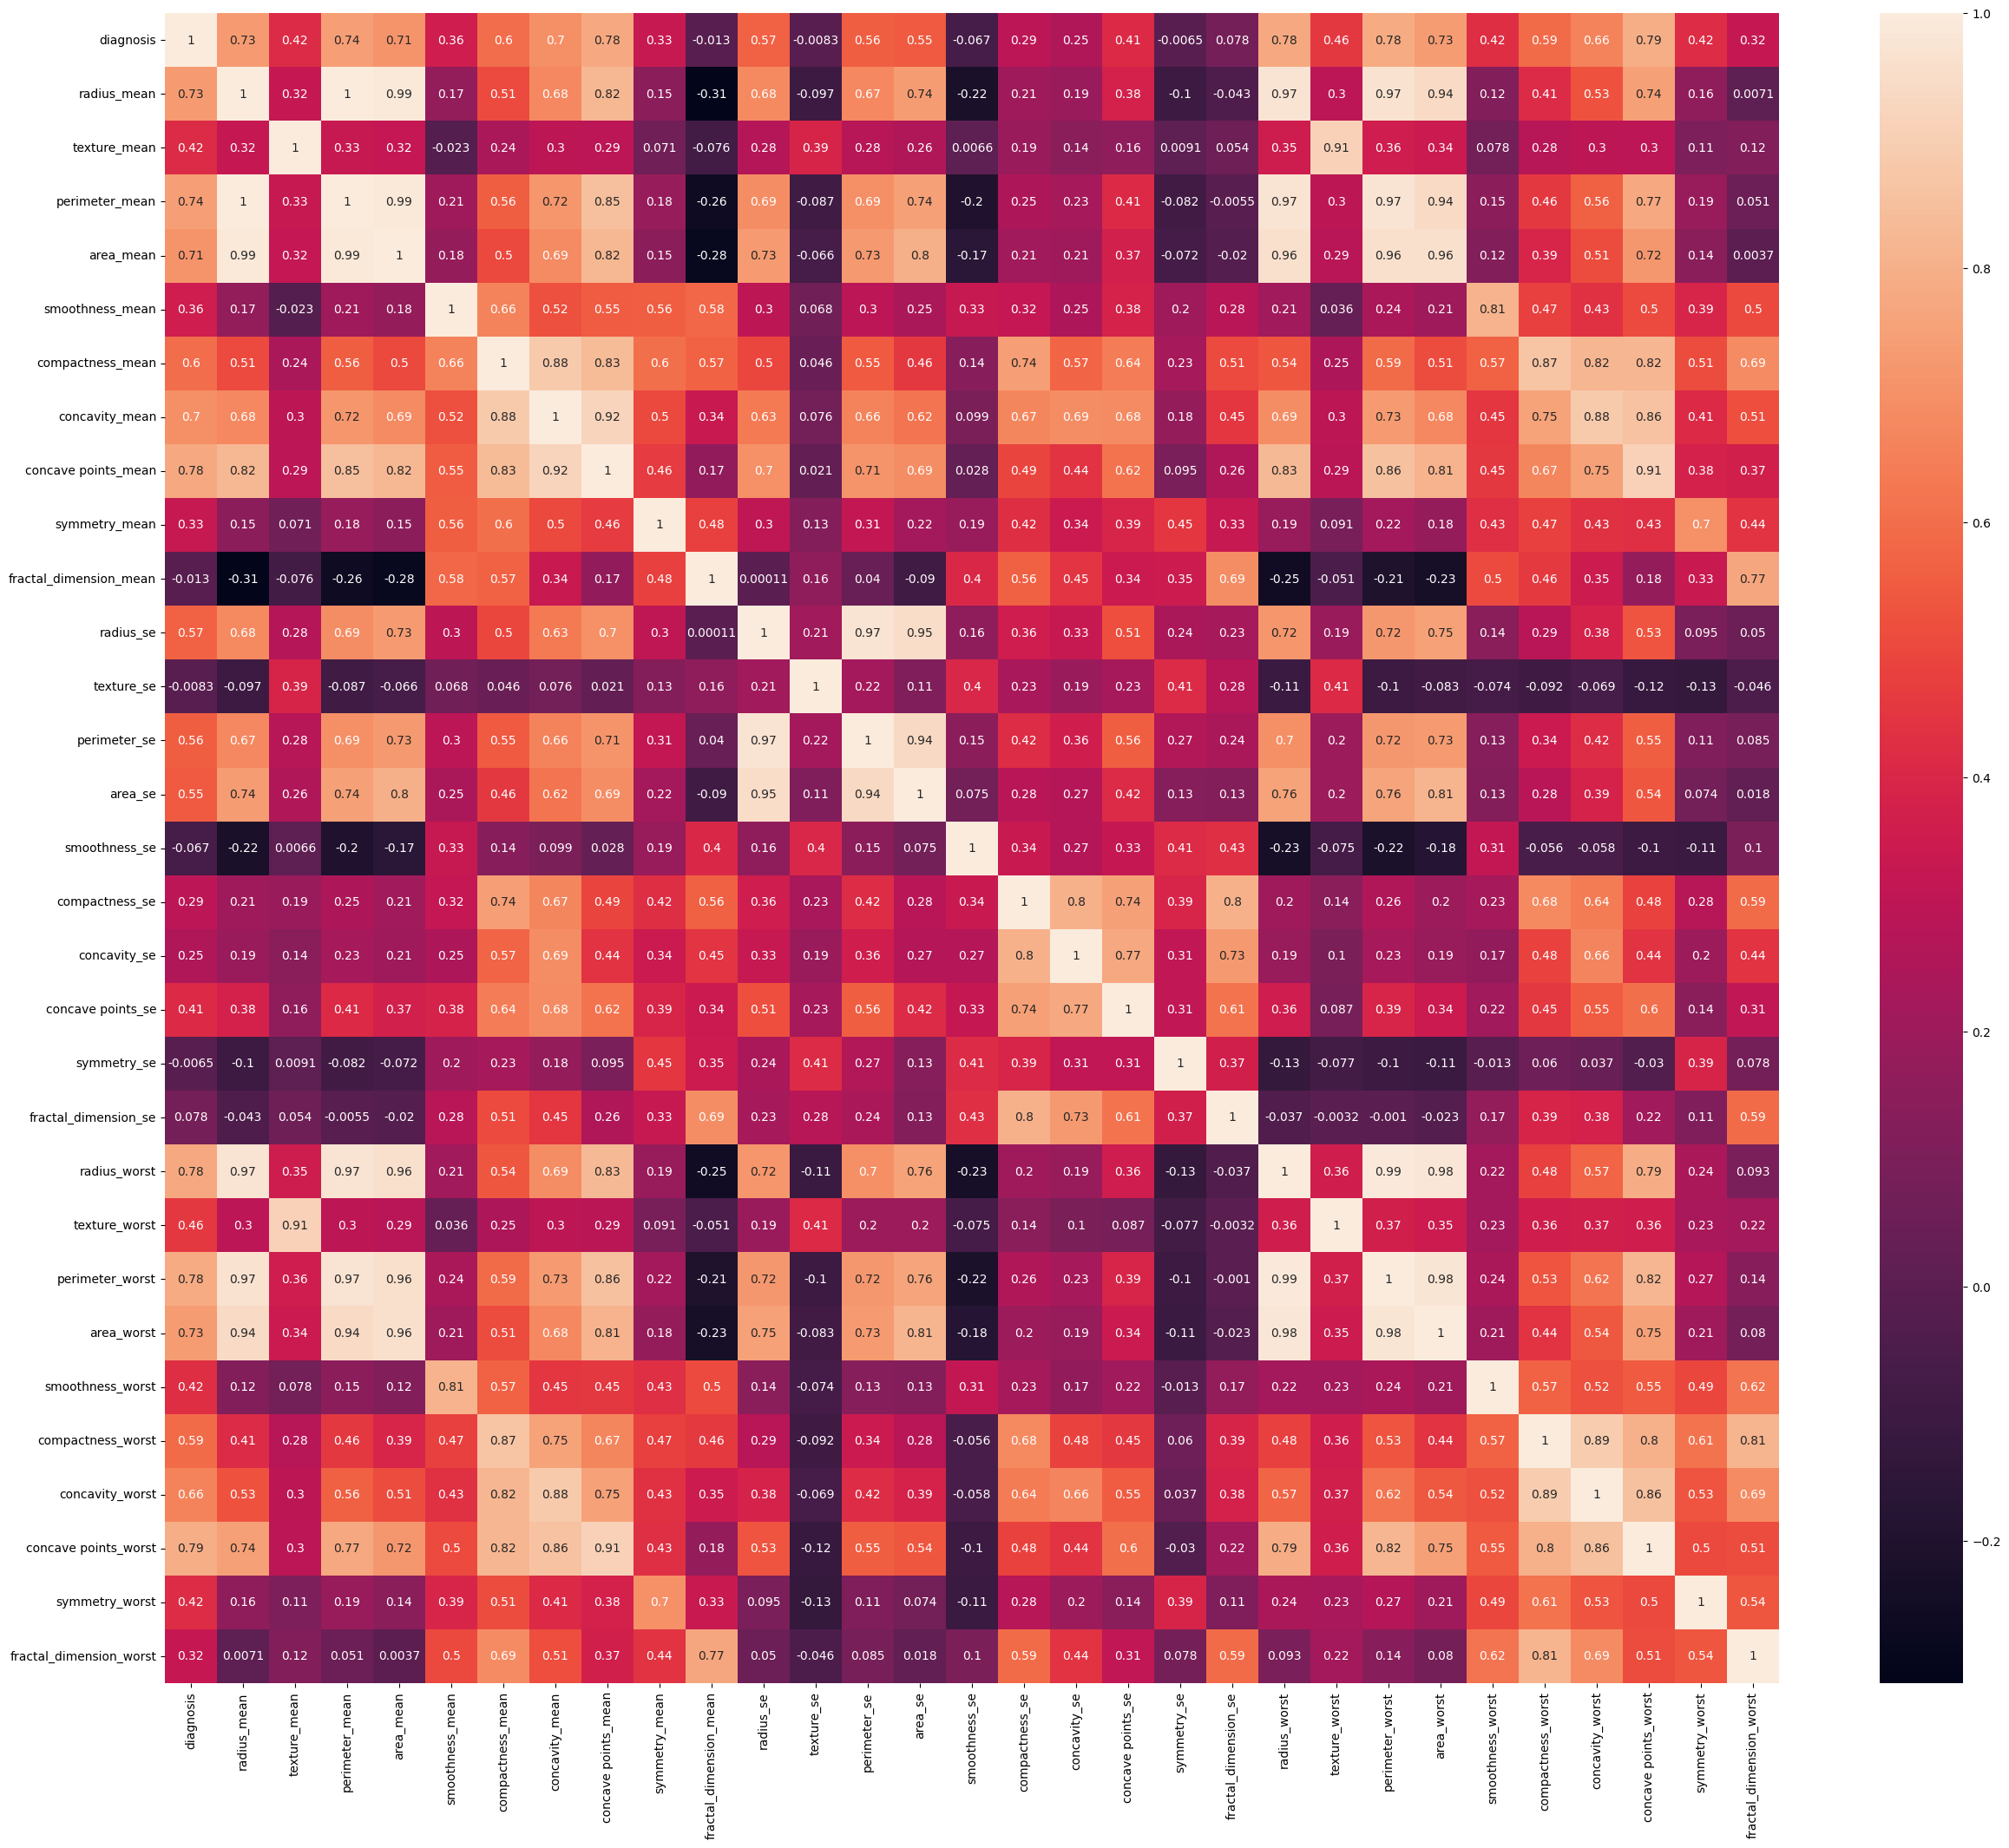

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,25))
sns.heatmap(data.corr(), annot=True)


# 3. Modelagem e Avaliação de Modelos

Nesta seção, concentramo-nos na aplicação e avaliação de vários modelos de aprendizado de máquina, visando identificar o mais adequado para nossos dados.

In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from seaborn import heatmap, scatterplot
import matplotlib.pyplot as plt
import numpy as np

## Implementação dos Modelos

Utilizamos uma variedade de modelos, incluindo RandomForestClassifier, KNeighborsClassifier e SVC. Estes modelos são conhecidos por sua eficácia em tarefas de classificação.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

## Avaliação e Comparação dos Modelos

Para cada modelo, realizamos validação cruzada e avaliamos usando métricas como acurácia, precisão, recall e F1-score. Além disso, empregamos visualizações detalhadas para entender melhor o desempenho de cada modelo.

In [13]:
def get_stats(model_name, ypred):
    print(f"{model_name} Accuracy Score: {accuracy_score(y, ypred)*100:.2f}%")
    print(f"{model_name} Precision: {precision_score(y, ypred)*100:.2f}%")
    print(f"{model_name} Recall: {recall_score(y, ypred)*100:.2f}%")
    print(f"{model_name} F1: {f1_score(y, ypred)*100:.2f}%")

    plt.figure(figsize=(5, 4))
    heatmap(confusion_matrix(y, ypred), annot=True, fmt="d")
    plt.xlabel("Predição")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão")
    plt.show()
    

Random Forest Accuracy Score: 95.96%
Random Forest Precision: 96.55%
Random Forest Recall: 92.45%
Random Forest F1: 94.46%


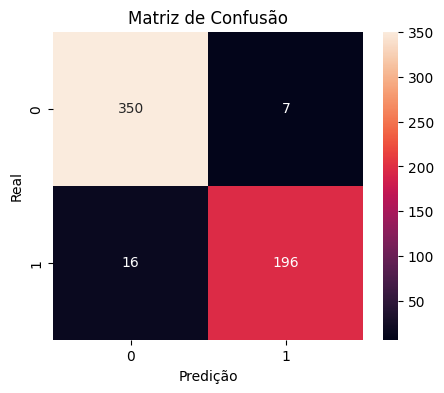

KNN Accuracy Score: 96.66%
KNN Precision: 98.01%
KNN Recall: 92.92%
KNN F1: 95.40%


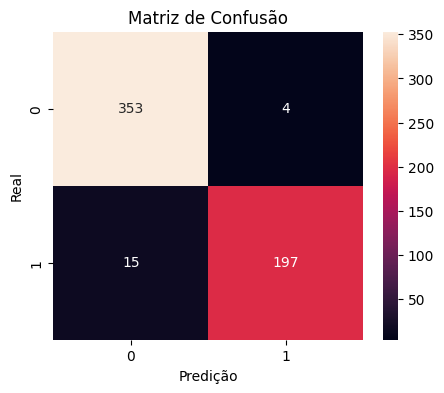

SVM Accuracy Score: 97.72%
SVM Precision: 97.61%
SVM Recall: 96.23%
SVM F1: 96.91%


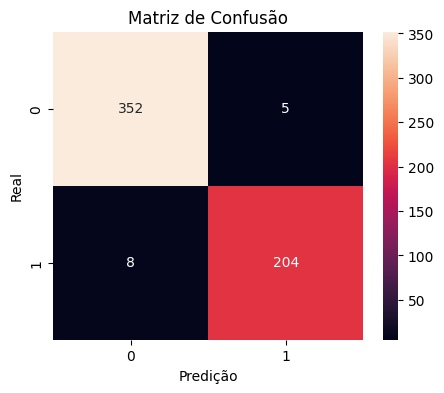

In [14]:
for model_name, model in models.items():
    ypred = cross_val_predict(model, X, y, cv=10)
    get_stats(model_name, ypred)


# 4. Redução de Dimensionalidade com RFECV

O objetivo central desta análise é desenvolver um modelo de aprendizado de máquina eficiente que utilize um número reduzido de examaes para reduzir o custo do diagnóstico com a menor perda possível. A aplicação da Recursive Feature Elimination (RFE) com validação cruzada é estratégica para alcançar uma simplificação significativa dos dados, sem comprometer a capacidade de diferenciar corretamente tumores mamários como benignos ou malignos. Essa abordagem busca minimizar a quantidade de testes necessários, mantendo ou até melhorando a precisão na classificação.

## Implementação do Recursive Feature Elimination with Cross-Validation (RFECV)

Melhor número de features: 19


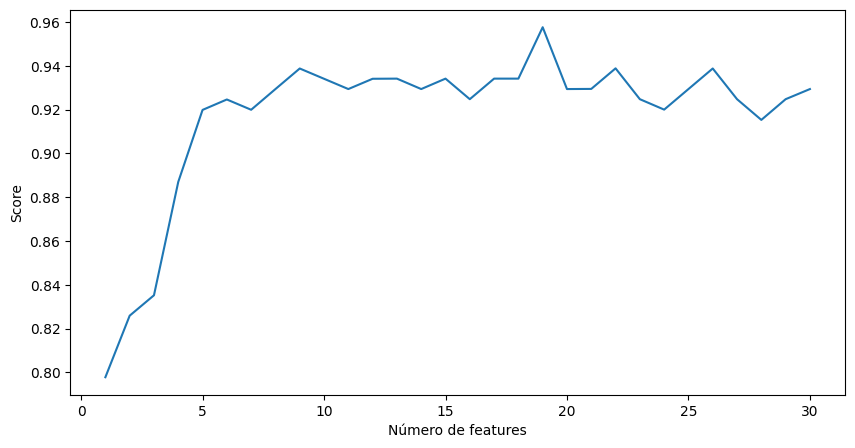

Features selecionadas: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_se', 'area_se', 'concavity_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [15]:
from sklearn.feature_selection import RFECV

selector = RFECV(RandomForestClassifier(), cv=3, scoring="recall")
X_new = selector.fit_transform(X, y)


print(f"Melhor número de features: {selector.n_features_}")

plt.figure(figsize=(10, 5))
plt.xlabel("Número de features")
plt.ylabel("Score")
plt.plot(range(1, len(selector.cv_results_["mean_test_score"]) + 1), selector.cv_results_["mean_test_score"])
plt.show()

features = data.columns[1:][selector.get_support()]
print(f"Features selecionadas: {features}")

Com a redução para nove features, simplificamos o conjunto de dados, visando preservar as informações cruciais para a classificação dos tumores.

## Visualização e Análise Com Principal Component Analysis (PCA)

Após a aplicação do RFECV, é essencial visualizar os dados transformados e analisar como a redução impacta a capacidade do modelo de diferenciar entre tumores benignos e malignos. Para isso faremos outra redução de dimensionalidade nos dados originais, dessa usando o PCA, para a visualização dos dados em 2 dimensões.

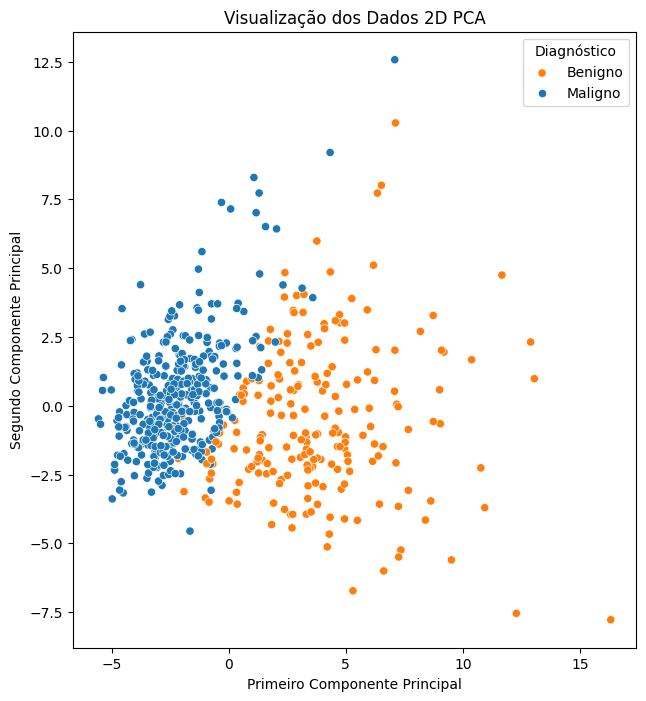

In [16]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
x_pca = pca.fit_transform(X, y)

data_pca = pd.DataFrame(x_pca, columns=["PCA_1", "PCA_2", "PCA_3"])
data_pca["diagnosis"] = y

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y)
plt.title('Visualização dos Dados 2D PCA')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])

plt.show()


In [17]:
fig = px.scatter_3d(data_pca, "PCA_1", "PCA_2", "PCA_3", color="diagnosis", opacity=0.7)
fig.update_traces(marker_size=2)
fig.show()

## Avaliação do Impacto do RFECV no Modelo escolhido

Finalmente, avaliamos o impacto da redução de dimensionalidade na precisão e eficiência dos modelos de classificação. Este passo é crucial para validar se a PCA contribui positivamente para atingir nosso objetivo de manter a precisão na classificação com menos testes.

In [31]:
def get_graphs(model_name, ypred):
    print(f"{model_name} Accuracy Score: {accuracy_score(y, ypred)*100:.2f}%")
    print(f"{model_name} Precision: {precision_score(y, ypred)*100:.2f}%")
    print(f"{model_name} Recall: {recall_score(y, ypred)*100:.2f}%")
    print(f"{model_name} F1: {f1_score(y, ypred)*100:.2f}%")
    
    err = np.where(y != ypred)[0]

    plt.figure(figsize=(18, 6))

    plt.subplot(1,3,1)
    heatmap(confusion_matrix(y, ypred), annot=True, fmt="d", annot_kws={"fontsize": 16})
    plt.xlabel("Predição", fontsize=12)
    plt.ylabel("Real", fontsize=12)
    plt.title("Matrix de Confusão" , fontsize=16)

 
    

    plt.subplot(1,3,2)
    scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, legend="full")
    plt.title("Dados Originais", fontsize=16)

    plt.subplot(1, 3, 3)
    scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=ypred, legend="full")
    scatterplot(x=x_pca[err, 0], y=x_pca[err, 1], color="yellow", edgecolor="black", label="Erros")
    plt.legend()
    plt.title(f"Como o {model_name} Classificou os Dados", fontsize=16)

    plt.tight_layout()

    plt.show()

SVC Accuracy Score: 97.19%
SVC Precision: 96.67%
SVC Recall: 95.75%
SVC F1: 96.21%


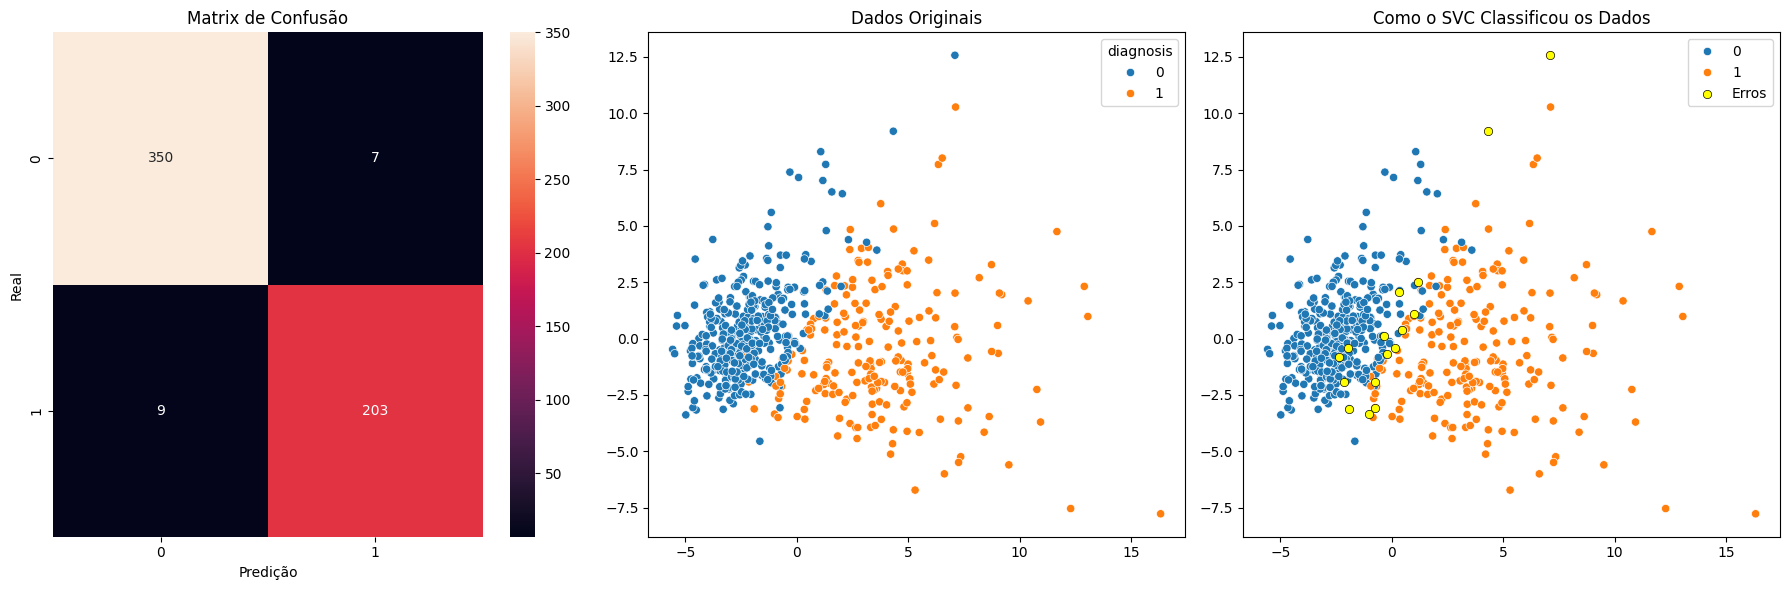

In [19]:
y_pred = cross_val_predict(SVC(), X_new, y, cv=10)
get_graphs("SVC", y_pred)

## Afinando o Modelo Final

Nesta etapa, focamos na otimização e ajuste fino dos modelos de aprendizado de máquina que demonstraram maior potencial nas etapas anteriores. O objetivo é melhorar ainda mais a precisão e eficiência dos modelos na classificação dos tumores mamários.

Melhores parâmetros: {'C': 2.5, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor score: 0.9668831168831169
SVC Melhorado Accuracy Score: 98.07%
SVC Melhorado Precision: 98.09%
SVC Melhorado Recall: 96.70%
SVC Melhorado F1: 97.39%


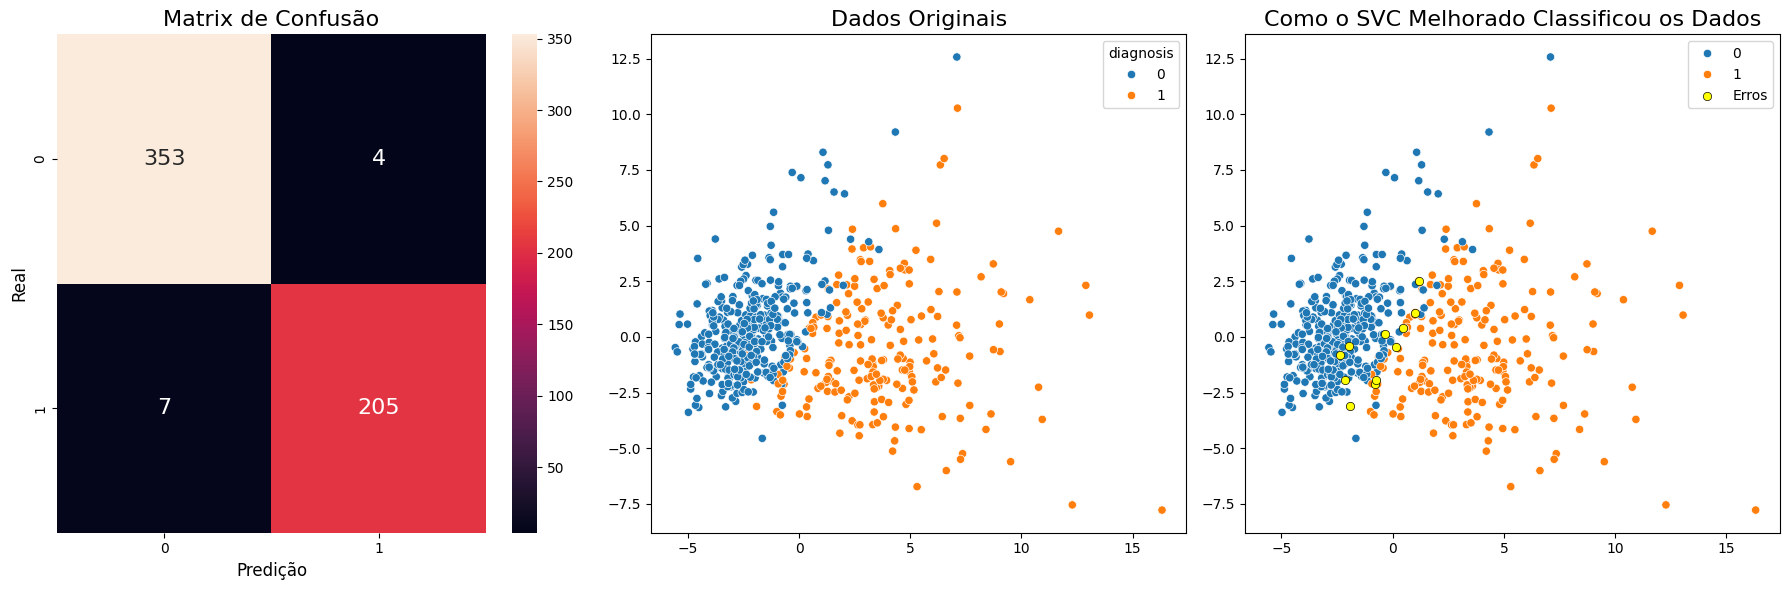

In [32]:
from sklearn.model_selection import GridSearchCV

model = SVC()

params = {
    "C": [0.1, 0.5, 1, 2.5, 5, 7.5, 10, 25, 50, 100, 500, 1000],
    "kernel": ["linear", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}


grid = GridSearchCV(model, params, cv=10, scoring="recall", n_jobs=-1)
grid.fit(X_new, y)

print(f"Melhores parâmetros: {grid.best_params_}")
print(f"Melhor score: {grid.best_score_}")

model = grid.best_estimator_
ypred = cross_val_predict(model, X_new, y, cv=10)

get_graphs("SVC Melhorado", ypred)

Esta etapa final de afinamento do modelo é decisiva para garantir que alcançamos nosso objetivo de desenvolver um modelo eficiente e preciso, capaz de classificar tumores mamários como benignos ou malignos, mesmo com um conjunto de dados reduzidos pelo RFECV.